# National Parks Data Analysis

- This research was a part of my DataScience competition, Plot-a-thon 2025

- The dataset contains information about the National Parks in the United States, including visitation statistics, camping preferences, and species conservation status.
- The goal is to analyze the data to identify patterns and insights that can tell a story about visitorship and conservation efforts in the parks.

Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import contextily as ctx
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
class ParksTheme:
    """
    Enhanced theme system for national parks visualizations with improved dark mode.
    """

    COLORS = {
        'dark': {
            # Main palette - matching your visualization style
            'palette': [
                '#7CB5B5',    # Soft teal
                '#B5D8E9',    # Light blue
                '#FAC87C',    # Warm gold
                '#26A69A',    # Mint
                '#8B9D77',    # Sage
                '#4F84A8'     # Ocean blue
            ],

            # Background elements - matching your dark theme
            'background': '#1E1E1E',
            'figure.facecolor': '#1E1E1E',
            'axes.facecolor': '#2D2D2D',
            'grid.color': '#3D3D3D',

            # Text and border elements
            'text.color': '#E0E0E0',
            'axes.labelcolor': '#E0E0E0',
            'tick.color': '#BDBDBD',

            # Specific plot elements
            'axes.edgecolor': '#404040',
            'spines.color': '#404040',
            'patch.edgecolor': '#404040'
        },


        'light': {
            # Main palette - richer earth tones
            'palette': ['#2E7D32',    # Forest green
                        '#1565C0',     # Deep blue
                        '#6D4C41',     # Rich brown
                        '#00695C',     # Deep teal
                        '#F4511E',     # Terra cotta
                        '#5E35B1'],    # Deep purple

            # Background elements
            'background': '#FFFFFF',
            'figure.facecolor': '#FFFFFF',
            'axes.facecolor': '#F8F9FA',  # Very light gray
            'grid.color': '#E9ECEF',      # Subtle grid

            # Text elements
            'text.color': '#212529',      # Deep gray, not pure black
            'axes.labelcolor': '#212529',
            'tick.color': '#495057',      # Lighter for ticks

            # Specific plot elements
            'axes.edgecolor': '#DEE2E6',  # Light edges
            'spines.color': '#DEE2E6',
            'patch.edgecolor': '#DEE2E6'
        }
    }

    @classmethod
    def set_theme(cls, mode='light'):
        """Set the theme for either light or dark mode."""
        colors = cls.COLORS[mode]

        # Base style - using seaborn as starting point
        sns.set_style("darkgrid" if mode == 'dark' else "whitegrid")

        # Create the style dictionary
        style = {
            # Figure
            'figure.figsize': (12, 8),
            'figure.dpi': 100,
            'figure.facecolor': colors['figure.facecolor'],

            # Axes
            'axes.facecolor': colors['axes.facecolor'],
            'axes.edgecolor': colors['axes.edgecolor'],
            'axes.labelcolor': colors['text.color'],
            'axes.grid': True,
            'axes.prop_cycle': plt.cycler('color', colors['palette']),

            # Grid
            'grid.alpha': 0.2 if mode == 'dark' else 0.4,
            'grid.color': colors['grid.color'],
            'grid.linestyle': ':',  # Dotted instead of dashed

            # Spines
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'axes.spines.right': False,
            'axes.spines.top': False,

            # Text
            'text.color': colors['text.color'],
            'font.size': 11,
            'axes.titlesize': 14,
            'axes.labelsize': 12,

            # Ticks
            'xtick.color': colors['tick.color'],
            'ytick.color': colors['tick.color'],
            'xtick.labelsize': 10,
            'ytick.labelsize': 10,

            # Legend
            'legend.frameon': True,
            'legend.framealpha': 0.8,
            'legend.facecolor': colors['axes.facecolor'],
            'legend.edgecolor': colors['axes.edgecolor'],

            # Patches (bars, boxes, etc.)
            'patch.edgecolor': colors['patch.edgecolor'],
            'patch.force_edgecolor': True,
        }

        # Update matplotlib rcParams
        plt.rcParams.update(style)

        # Set seaborn specific settings
        sns.set_palette(colors['palette'])

        # Configure seaborn figure style
        sns.set_context("notebook", rc={
            "lines.linewidth": 2,
            "patch.linewidth": 0.5,
            "axes.linewidth": 1.0
        })

    @classmethod
    def apply_custom_style(cls, ax, mode='dark'):
        """Apply additional custom styling to a specific axis."""
        colors = cls.COLORS[mode]

        # Enhance grid
        ax.grid(True, linestyle=':', alpha=0.2 if mode == 'dark' else 0.4)

        # Soften spines
        for spine in ax.spines.values():
            spine.set_color(colors['spines.color'])
            spine.set_linewidth(0.5)

        # Add subtle background to legend if present
        if ax.get_legend():
            ax.get_legend().get_frame().set_facecolor(colors['axes.facecolor'])
            ax.get_legend().get_frame().set_edgecolor(colors['axes.edgecolor'])

    @classmethod
    def get_colors(cls, mode='light'):
        """Get the color palette for the specified mode."""
        return cls.COLORS[mode]['palette']

ParksTheme.set_theme('dark')
data = pd.read_csv('dataset.csv')
data.fillna(method='ffill', inplace=True)
columns_to_drop = ['State', 'Year']
data = data.drop(columns=columns_to_drop)
data.head()

,Park Name,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,...,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays
0,Channel Islands National Park,249561,34.01,-119.42,CHIS-1002,Mammal,Carnivora,Mustelidae,Enhydra lutris nereis,Sea Otter,...,12197,4254417,292735,0,0,0,0,23881,8591,45077
1,Channel Islands National Park,249561,34.01,-119.42,CHIS-1003,Mammal,Carnivora,Otariidae,Arctocephalus townsendi,Guadalupe Fur Seal,...,12197,4254417,292735,0,0,0,0,23881,8591,45077
2,Channel Islands National Park,249561,34.01,-119.42,CHIS-1005,Mammal,Carnivora,Otariidae,Eumetopias jubatus,"Northern Sea Lion, Stellar Sea Lion",...,12197,4254417,292735,0,0,0,0,23881,8591,45077
3,Channel Islands National Park,249561,34.01,-119.42,CHIS-1009,Mammal,Cetacea,Balaenidae,Eubalaena glacialis,Northern Right Whale,...,12197,4254417,292735,0,0,0,0,23881,8591,45077
4,Channel Islands National Park,249561,34.01,-119.42,CHIS-1011,Mammal,Cetacea,Balaenopteridae,Balaenoptera borealis,Rorqual (Sei Whale),...,12197,4254417,292735,0,0,0,0,23881,8591,45077


Data Cleaning and Preprocessing

In [3]:
def clean_ints(data, columns):
    for column in columns:
        data[column] = data[column].str.replace(',', '')
        data[column] = data[column].astype(int)
    return data

columns = ['Recreation Visits', 'Non-Recreation Visits',
           'Recreation Hours', 'Non-Recreation Hours', 
           'Concessioner Lodging', 'Concessioner Camping',
           'Tent Campers', 'RV Campers', 'Backcountry Campers',
           'Misc. Overnight Stays']
data = clean_ints(data, columns)

data['Average Recreation Time In Park'] = data['Recreation Visits'] / data['Recreation Hours']
data['Average Non-Recreation Time In Park'] = data['Non-Recreation Visits'] / data['Non-Recreation Hours']

endagerment_map = {
    'Under Review': 0,
    'Species of Concern': 1,
    'Threatened': 2,
    'Endangered': 3
}

# encode the 'Federal Conservation Status' column using the map
data['Federal Conservation Status'] = data['Federal Conservation Status'].map(endagerment_map)
data.dropna(inplace=True)
data.head()

,Park Name,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,...,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Average Recreation Time In Park,Average Non-Recreation Time In Park
1,Channel Islands National Park,249561,34.01,-119.42,CHIS-1003,Mammal,Carnivora,Otariidae,Arctocephalus townsendi,Guadalupe Fur Seal,...,292735,0,0,0,0,23881,8591,45077,0.077272,0.041666
3,Channel Islands National Park,249561,34.01,-119.42,CHIS-1009,Mammal,Cetacea,Balaenidae,Eubalaena glacialis,Northern Right Whale,...,292735,0,0,0,0,23881,8591,45077,0.077272,0.041666
4,Channel Islands National Park,249561,34.01,-119.42,CHIS-1011,Mammal,Cetacea,Balaenopteridae,Balaenoptera borealis,Rorqual (Sei Whale),...,292735,0,0,0,0,23881,8591,45077,0.077272,0.041666
5,Channel Islands National Park,249561,34.01,-119.42,CHIS-1012,Mammal,Cetacea,Balaenopteridae,Balaenoptera musculus,Blue Whale,...,292735,0,0,0,0,23881,8591,45077,0.077272,0.041666
6,Channel Islands National Park,249561,34.01,-119.42,CHIS-1013,Mammal,Cetacea,Balaenopteridae,Balaenoptera physalus,Finback Whale,...,292735,0,0,0,0,23881,8591,45077,0.077272,0.041666


In [4]:
def extensive_eda(df):
    """
    Perform exploratory data analysis (EDA) on the given DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    from IPython.display import display

    # Display the DataFrame info
    print("Information about the DataFrame:")
    df_info = df.info()
    display(df_info)
    print(".....")
    print("\n")

    # Display the first few rows of data
    print("First few rows of the DataFrame:")
    display(df.head().T)
    print(".....")
    print("\n")

    # Display the number of duplicate values in each column
    print("Number of duplicate values in each column:")
    duplicate_counts = df.duplicated().sum()
    display(duplicate_counts)
    print(".....")
    print("\n")

    # Display the number of missing datapoints in each column
    print("Number of missing datapoints in each column:")
    missing_counts = df.isna().sum()
    display(missing_counts)
    print(".....")
    print("\n")

    # Display the number of outliers in each column using the IQR technique
    print("Number of outliers in each column (using IQR technique):")
    outliers = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
    display(outliers)
    print(".....")
    print("\n")

    # Display basic statistics of the DataFrame
    print("Statistical summary of the DataFrame:")
    display(df.describe().T)
    print(".....")
    print("\n")

    # Display unique value count for each column
    print("Number of unique values in each column:")
    unique_counts = df.nunique()
    display(unique_counts)
    print(".....")
    print("\n")

    # Display column-wise summary in a table
    print("Column-wise summary:")
    summary_data = []
    for column in df.columns:
        column_summary = {
            "Column": column,
            "Data Type": df[column].dtype,
            "Missing Values": missing_counts[column],
            "Unique Values": unique_counts[column],
            "Outliers": outliers.get(column, 0) if df[column].dtype in ['int64', 'float64'] else "N/A",
            "Top 5 Values": df[column].value_counts().head().to_dict() if df[column].dtype == 'object' else "N/A"
        }
        summary_data.append(column_summary)
    summary_df = pd.DataFrame(summary_data)
    display(summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))
    print(".....")
    print("\n")

    # Display correlation matrix for numerical features only
    print("Correlation matrix of numerical features:")
    numerical_df = df.select_dtypes(include=['number'])
    display(numerical_df.corr())
    print(".....")
    print("\n")

    # Display value counts for categorical columns in a table with widened format
    print("Value counts for categorical columns:")
    value_counts_data = []
    for column in df.select_dtypes(include=['object']).columns:
        value_counts = df[column].value_counts().head().to_dict()
        value_counts_data.append({"Column": column, "Top 5 Values": value_counts})
    value_counts_df = pd.DataFrame(value_counts_data)
    display(value_counts_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))
    print(".....")
    print("\n")

extensive_eda(data)

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 1 to 1020
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Park Name                            832 non-null    object 
 1   Acres                                832 non-null    int64  
 2   Latitude                             832 non-null    float64
 3   Longitude                            832 non-null    float64
 4   Species ID                           832 non-null    object 
 5   Category                             832 non-null    object 
 6   Order                                832 non-null    object 
 7   Family                               832 non-null    object 
 8   Scientific Name                      832 non-null    object 
 9   Common Names                         832 non-null    object 
 10  Record Status                        832 non-null    object 
 11  Occ

None

.....


First few rows of the DataFrame:


,1,3,4,5,6
Park Name,Channel Islands National Park,Channel Islands National Park,Channel Islands National Park,Channel Islands National Park,Channel Islands National Park
Acres,249561,249561,249561,249561,249561
Latitude,34.01,34.01,34.01,34.01,34.01
Longitude,-119.42,-119.42,-119.42,-119.42,-119.42
Species ID,CHIS-1003,CHIS-1009,CHIS-1011,CHIS-1012,CHIS-1013
Category,Mammal,Mammal,Mammal,Mammal,Mammal
Order,Carnivora,Cetacea,Cetacea,Cetacea,Cetacea
Family,Otariidae,Balaenidae,Balaenopteridae,Balaenopteridae,Balaenopteridae
Scientific Name,Arctocephalus townsendi,Eubalaena glacialis,Balaenoptera borealis,Balaenoptera musculus,Balaenoptera physalus
Common Names,Guadalupe Fur Seal,Northern Right Whale,Rorqual (Sei Whale),Blue Whale,Finback Whale


.....


Number of duplicate values in each column:


0

.....


Number of missing datapoints in each column:


Park Name                              0
Acres                                  0
Latitude                               0
Longitude                              0
Species ID                             0
Category                               0
Order                                  0
Family                                 0
Scientific Name                        0
Common Names                           0
Record Status                          0
Occurrence in Park                     0
Nativeness to Park                     0
Abundance in Park                      0
Seasonality                            0
Federal Conservation Status            0
Recreation Visits                      0
Non-Recreation Visits                  0
Recreation Hours                       0
Non-Recreation Hours                   0
Concessioner Lodging                   0
Concessioner Camping                   0
Tent Campers                           0
RV Campers                             0
Backcountry Camp

.....


Number of outliers in each column (using IQR technique):


{'Acres': 0,
 'Latitude': 0,
 'Longitude': 162,
 'Federal Conservation Status': 172,
 'Recreation Visits': 201,
 'Non-Recreation Visits': 94,
 'Recreation Hours': 94,
 'Non-Recreation Hours': 94,
 'Concessioner Lodging': 181,
 'Concessioner Camping': 0,
 'Tent Campers': 201,
 'RV Campers': 0,
 'Backcountry Campers': 94,
 'Non-Recreation Overnight Stays': 138,
 'Misc. Overnight Stays': 0,
 'Average Recreation Time In Park': 0,
 'Average Non-Recreation Time In Park': 162}

.....


Statistical summary of the DataFrame:


,count,mean,std,min,25%,50%,75%,max
Acres,832.0,1.731789e+06,1.958060e+06,1.125120e+05,2.495610e+05,7.897450e+05,4.740912e+06,4.740912e+06
Latitude,832.0,3.673978e+01,2.574819e+00,3.379000e+01,3.401000e+01,3.624000e+01,3.783000e+01,4.130000e+01
Longitude,832.0,-1.190282e+02,2.752079e+00,-1.240000e+02,-1.195000e+02,-1.186800e+02,-1.168200e+02,-1.159000e+02
Federal Conservation Status,832.0,1.195913e+00,6.842443e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Recreation Visits,832.0,1.420095e+06,1.257884e+06,3.287460e+05,4.091050e+05,1.099632e+06,1.099632e+06,3.897070e+06
Non-Recreation Visits,832.0,3.818248e+04,4.583898e+04,1.082400e+04,1.217100e+04,1.377700e+04,4.415800e+04,1.601670e+05
Recreation Hours,832.0,1.516466e+07,1.598418e+07,1.773959e+06,4.254417e+06,8.182261e+06,1.915604e+07,5.205710e+07
Non-Recreation Hours,832.0,5.554896e+05,1.321248e+06,2.724000e+03,1.217100e+04,6.623600e+04,2.927350e+05,4.245429e+06
Concessioner Lodging,832.0,7.376496e+04,1.762237e+05,0.000000e+00,0.000000e+00,1.709400e+04,1.709400e+04,5.656440e+05
Concessioner Camping,832.0,7.786298e+02,1.209444e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.655000e+03,2.655000e+03


.....


Number of unique values in each column:


Park Name                                6
Acres                                    6
Latitude                                 6
Longitude                                6
Species ID                             832
Category                                10
Order                                   66
Family                                 144
Scientific Name                        435
Common Names                           440
Record Status                            2
Occurrence in Park                       4
Nativeness to Park                       3
Abundance in Park                        6
Seasonality                              6
Federal Conservation Status              4
Recreation Visits                        6
Non-Recreation Visits                    6
Recreation Hours                         6
Non-Recreation Hours                     6
Concessioner Lodging                     4
Concessioner Camping                     2
Tent Campers                             6
RV Campers 

.....


Column-wise summary:


,Column,Data Type,Missing Values,Unique Values,Outliers,Top 5 Values
0,Park Name,object,0,6,N/A,"{'Death Valley National Park': 244, 'Redwood National Park': 162, 'Channel Islands National Park': 138, 'Joshua Tree National Park': 107, 'Yosemite National Park': 94}"
1,Acres,int64,0,6,0,N/A
2,Latitude,float64,0,6,0,N/A
3,Longitude,float64,0,6,162,N/A
4,Species ID,object,0,832,N/A,"{'CHIS-1003': 1, 'CHIS-1009': 1, 'REDW-1386': 1, 'REDW-1395': 1, 'REDW-1406': 1}"
5,Category,object,0,10,N/A,"{'Bird': 379, 'Vascular Plant': 201, 'Mammal': 111, 'Reptile': 35, 'Amphibian': 34}"
6,Order,object,0,66,N/A,"{'Passeriformes': 147, 'Chiroptera': 64, 'Accipitriformes': 59, 'Charadriiformes': 30, 'Pelecaniformes': 26}"
7,Family,object,0,144,N/A,"{'Vespertilionidae': 61, 'Accipitridae': 44, 'Emberizidae': 29, 'Asteraceae': 22, 'Hydrobiidae': 22}"
8,Scientific Name,object,0,435,N/A,"{'Asio otus': 6, 'Loxia curvirostra': 6, 'Pandion haliaetus': 6, 'Aythya affinis': 6, 'Phainopepla nitens': 6}"
9,Common Names,object,0,440,N/A,"{'Idaho Dunes Tiger Beetle, St. Anthony Dune Tiger Beetle': 12, 'Long-Eared Owl': 7, 'Phainopepla': 7, 'White-Tailed Kite': 7, 'Willow Flycatcher': 7}"


.....


Correlation matrix of numerical features:


,Acres,Latitude,Longitude,Federal Conservation Status,Recreation Visits,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Average Recreation Time In Park,Average Non-Recreation Time In Park
Acres,1.000000,-0.187039,0.604544,-0.060385,-0.061671,0.136903,-0.170516,-0.188219,-0.148365,0.990561,0.010619,0.270368,-0.323238,-0.337761,-0.440147,-0.038296,-0.293494
Latitude,-0.187039,1.000000,-0.821884,0.014457,-0.228498,0.104177,-0.083904,0.110860,0.144894,-0.125113,-0.206782,-0.174132,0.077013,-0.473045,-0.637501,0.572643,0.821731
Longitude,0.604544,-0.821884,1.000000,-0.083967,0.416021,0.112601,0.214182,-0.054556,-0.035902,0.517194,0.430914,0.495813,-0.103588,-0.063515,0.328069,-0.431993,-0.763563
Federal Conservation Status,-0.060385,0.014457,-0.083967,1.000000,-0.097428,-0.068289,-0.109908,-0.045449,-0.061028,-0.041707,-0.104035,-0.114330,-0.028290,0.117962,0.027031,0.047236,0.053872
Recreation Visits,-0.061671,-0.228498,0.416021,-0.097428,1.000000,0.670197,0.784656,0.679947,0.698094,-0.164212,0.993843,0.904608,0.684638,-0.387119,0.464120,-0.148325,-0.341741
Non-Recreation Visits,0.136903,0.104177,0.112601,-0.068289,0.670197,1.000000,0.762069,0.945063,0.955276,0.084025,0.734859,0.853219,0.883080,-0.252939,-0.128431,-0.324248,-0.360284
Recreation Hours,-0.170516,-0.083904,0.214182,-0.109908,0.784656,0.762069,1.000000,0.811976,0.854942,-0.281567,0.814111,0.802682,0.776961,-0.304554,0.098211,-0.554503,-0.466945
Non-Recreation Hours,-0.188219,0.110860,-0.054556,-0.045449,0.679947,0.945063,0.811976,1.000000,0.993035,-0.238681,0.720427,0.754929,0.985162,-0.088733,0.043664,-0.355277,-0.313192
Concessioner Lodging,-0.148365,0.144894,-0.035902,-0.061028,0.698094,0.955276,0.854942,0.993035,1.000000,-0.207283,0.743562,0.787963,0.963710,-0.186770,-0.019570,-0.361127,-0.304313
Concessioner Camping,0.990561,-0.125113,0.517194,-0.041707,-0.164212,0.084025,-0.281567,-0.238681,-0.207283,1.000000,-0.092939,0.172519,-0.368264,-0.287254,-0.478410,0.037156,-0.210677


.....


Value counts for categorical columns:


,Column,Top 5 Values
0,Park Name,"{'Death Valley National Park': 244, 'Redwood National Park': 162, 'Channel Islands National Park': 138, 'Joshua Tree National Park': 107, 'Yosemite National Park': 94}"
1,Species ID,"{'CHIS-1003': 1, 'CHIS-1009': 1, 'REDW-1386': 1, 'REDW-1395': 1, 'REDW-1406': 1}"
2,Category,"{'Bird': 379, 'Vascular Plant': 201, 'Mammal': 111, 'Reptile': 35, 'Amphibian': 34}"
3,Order,"{'Passeriformes': 147, 'Chiroptera': 64, 'Accipitriformes': 59, 'Charadriiformes': 30, 'Pelecaniformes': 26}"
4,Family,"{'Vespertilionidae': 61, 'Accipitridae': 44, 'Emberizidae': 29, 'Asteraceae': 22, 'Hydrobiidae': 22}"
5,Scientific Name,"{'Asio otus': 6, 'Loxia curvirostra': 6, 'Pandion haliaetus': 6, 'Aythya affinis': 6, 'Phainopepla nitens': 6}"
6,Common Names,"{'Idaho Dunes Tiger Beetle, St. Anthony Dune Tiger Beetle': 12, 'Long-Eared Owl': 7, 'Phainopepla': 7, 'White-Tailed Kite': 7, 'Willow Flycatcher': 7}"
7,Record Status,"{'Approved': 649, 'In Review': 183}"
8,Occurrence in Park,"{'Present': 682, 'Not Confirmed': 123, 'Not Present (False Report)': 16, 'Not Present (Historical Report)': 11}"
9,Nativeness to Park,"{'Native': 806, 'Not Native': 19, 'Unknown': 7}"


.....




Exploratory Data Analysis


In this part, I derived a metric called the 'Convenience Ratio' to analyze the convenience of overnight stays in different national parks.
The convenience ratio is calculated based on the type of camping facilities available in each park, with higher weights given to more convenient options like concessioner lodging and camping.
The analysis also includes visualizations of camping preferences by region and the geographic distribution of overnight stays.


/opt/anaconda3/envs/pyfi/lib/python3.8/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


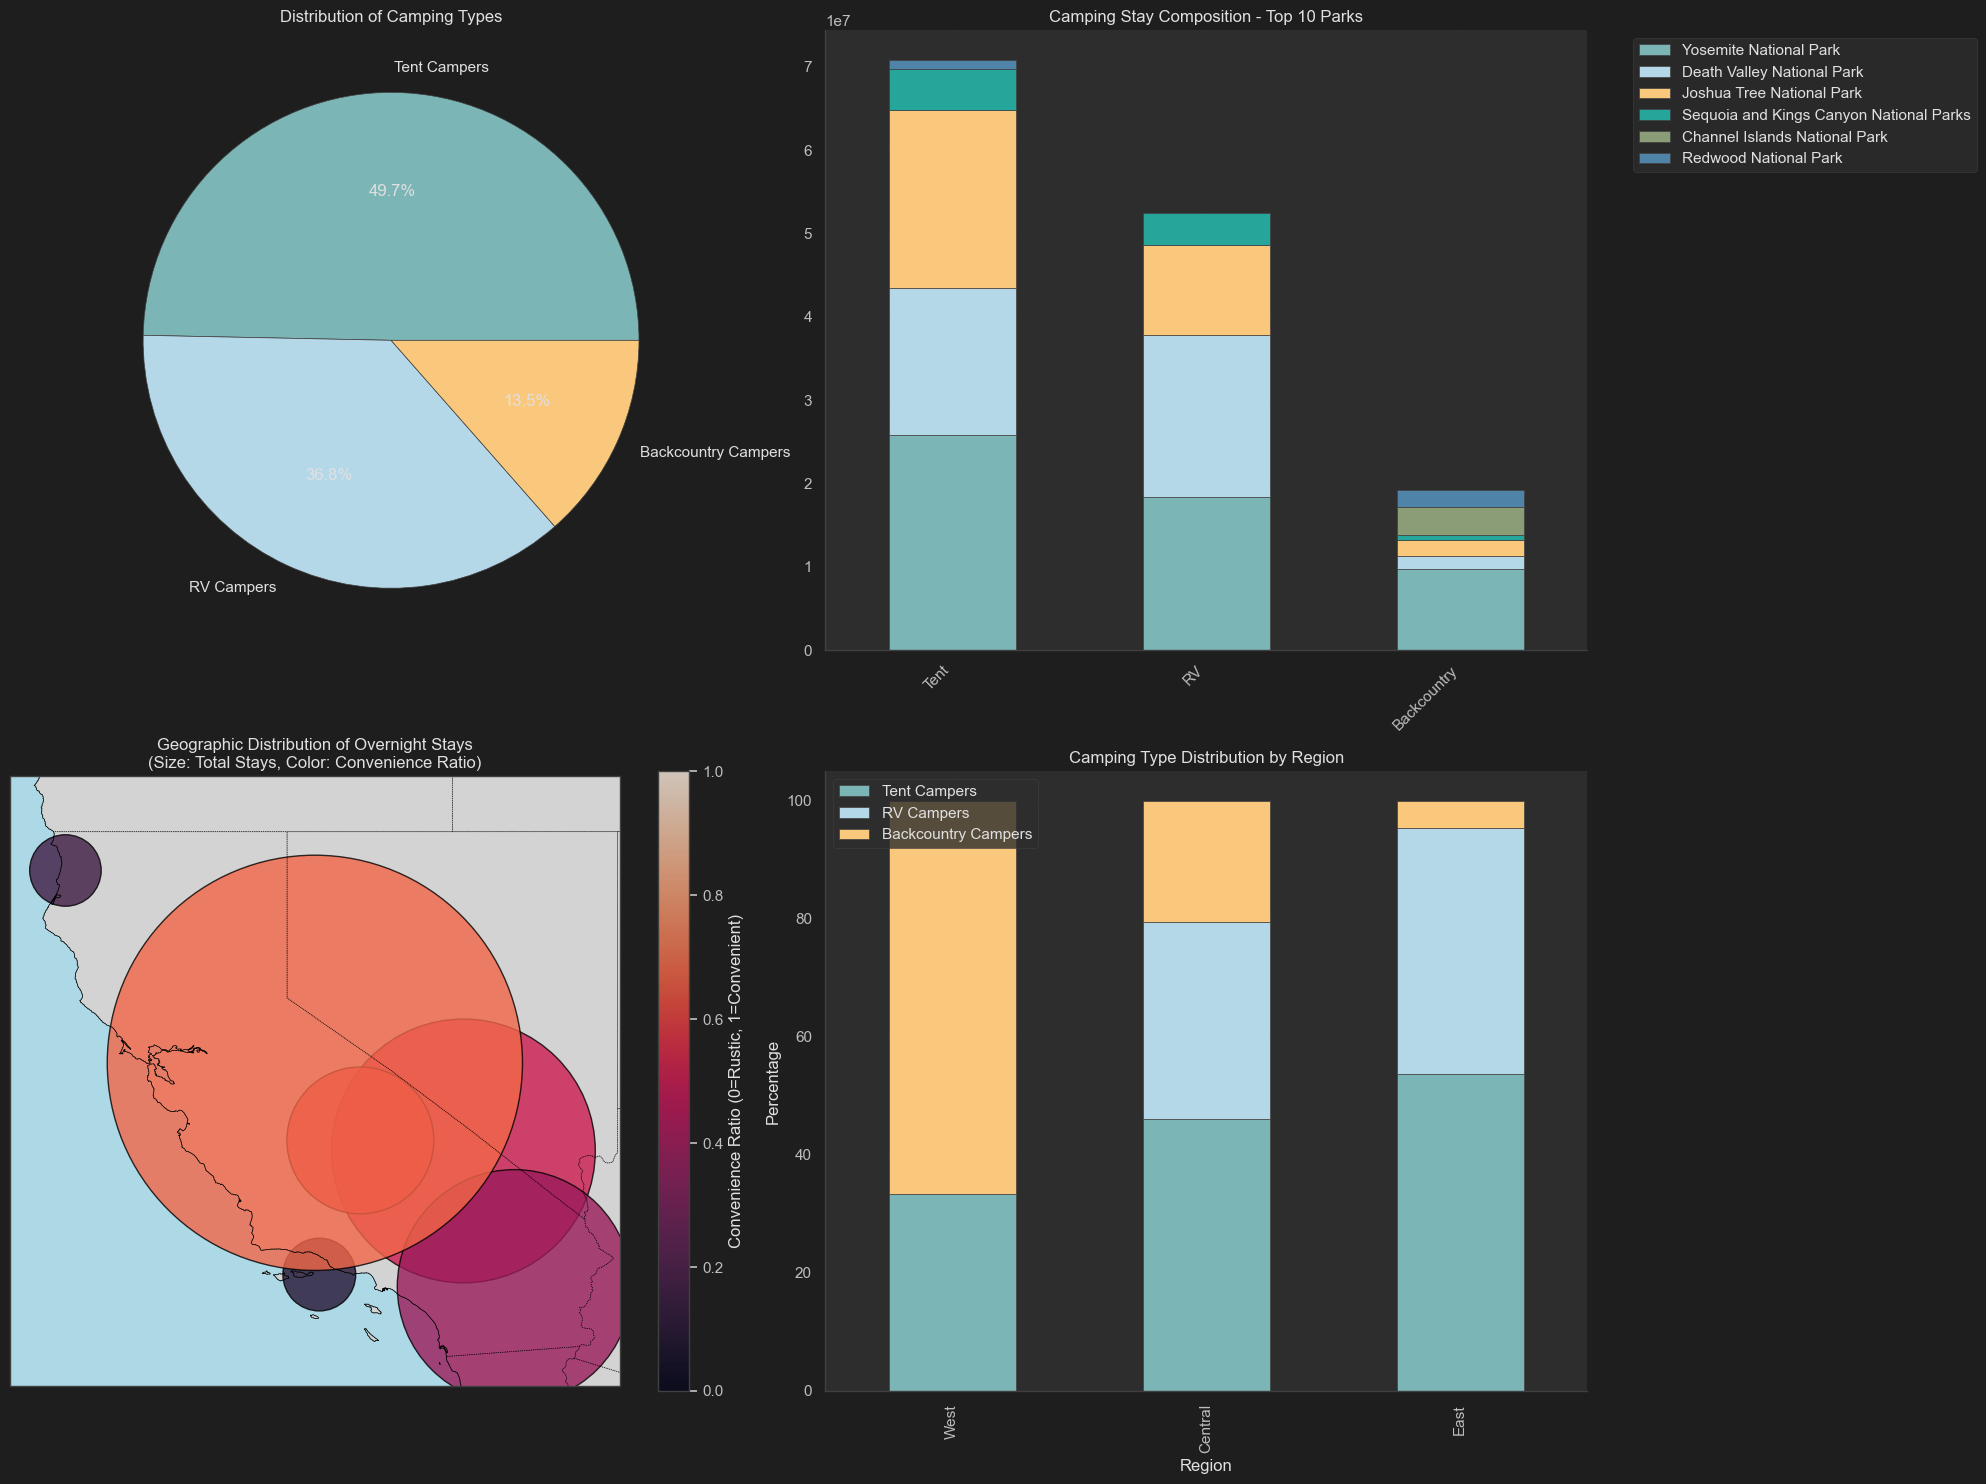


Convenience Ratio Statistics:
--------------------------------------------------

Parks with Highest Convenience Ratio (most amenities):
                                 Park Name  Convenience_Ratio  \
5                   Yosemite National Park           0.680346   
4  Sequoia and Kings Canyon National Parks           0.584679   
1               Death Valley National Park           0.502109   
2                Joshua Tree National Park           0.384570   
3                    Redwood National Park           0.166714   
0            Channel Islands National Park           0.100000   

   Total_Applicable_Stays  
5               107255034  
4                13422621  
1                43299264  
2                34129362  
3                 3182976  
0                 3295578  

Parks with Lowest Convenience Ratio (most rustic):
                                 Park Name  Convenience_Ratio  \
0            Channel Islands National Park           0.100000   
3                    Redwood

In [5]:
def analyze_overnight_patterns(df):
    """
    Analyze patterns in overnight stays with convenience ratio analysis.

    Convenience Ratio Weights:
    - Concessioner Lodging (hotels, cabins): 1.0 (most convenient)
    - Concessioner Camping (RV parks): 0.8
    - RV Campers: 0.6
    - Tent Campers: 0.3
    - Backcountry Campers: 0.1 (least convenient)
    """
    ParksTheme.set_theme('dark')

    # Convert relevant columns to numeric
    overnight_columns = [
        'Concessioner Lodging', 'Concessioner Camping',
        'Tent Campers', 'RV Campers', 'Backcountry Campers',
        'Non-Recreation Overnight Stays', 'Misc. Overnight Stays'
    ]

    for col in overnight_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Aggregate by park
    park_stays = df.groupby('Park Name').agg({
        'Concessioner Lodging': 'sum',
        'Concessioner Camping': 'sum',
        'Tent Campers': 'sum',
        'RV Campers': 'sum',
        'Backcountry Campers': 'sum',
        'Non-Recreation Overnight Stays': 'sum',
        'Misc. Overnight Stays': 'sum',
        'Latitude': 'first',
        'Longitude': 'first'
    }).reset_index()

    # Calculate convenience ratio
    convenience_weights = {
        'Concessioner Lodging': 1.0,
        'Concessioner Camping': 0.8,
        'RV Campers': 0.6,
        'Tent Campers': 0.3,
        'Backcountry Campers': 0.1
    }

    # Calculate weighted sum of stays
    park_stays['Weighted_Stays'] = sum(park_stays[col] * weight
                                       for col, weight in convenience_weights.items())
    park_stays['Total_Applicable_Stays'] = sum(park_stays[col]
                                               for col in convenience_weights.keys())
    park_stays['Convenience_Ratio'] = (park_stays['Weighted_Stays'] /
                                       park_stays['Total_Applicable_Stays']).fillna(0)

    # Define regions based on longitude
    park_stays['Region'] = pd.cut(park_stays['Longitude'],
                                  bins=3,
                                  labels=['West', 'Central', 'East'])

    # Create visualizations
    fig = plt.figure(figsize=(20, 15))

    # 1. Overall Distribution of Stay Types (Original)
    ax1 = plt.subplot(2, 2, 1)
    total_stays = park_stays[['Tent Campers', 'RV Campers', 'Backcountry Campers']].sum()
    total_stays.plot(kind='pie', autopct='%1.1f%%', ax=ax1)
    ax1.set_title('Distribution of Camping Types')

    # 2. Top Parks by Total Stays (Original)
    ax2 = plt.subplot(2, 2, 2)
    top_parks = park_stays.nlargest(10, 'Total_Applicable_Stays')
    stay_data = top_parks[['Tent Campers', 'RV Campers', 'Backcountry Campers']].T
    stay_data.columns = top_parks['Park Name']

    stay_data.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Camping Stay Composition - Top 10 Parks')
    ax2.set_xticklabels(['Tent', 'RV', 'Backcountry'], rotation=45, ha='right')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    # 3. Geographic Distribution with Convenience Ratio
    ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())

    # Add map features
    ax3.add_feature(cfeature.LAND, color='lightgray')
    ax3.add_feature(cfeature.OCEAN, color='lightblue')
    ax3.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax3.add_feature(cfeature.STATES, linestyle=':', linewidth=0.5)

    # Plot the points
    scatter = ax3.scatter(park_stays['Longitude'],
                          park_stays['Latitude'],
                          s=park_stays['Total_Applicable_Stays'] / 1200,
                          c=park_stays['Convenience_Ratio'],
                          # cmap='RdYlBu',
                          alpha=0.8,  # Increased from 0.6 to 0.8
                          vmin=0, vmax=1,
                          transform=ccrs.PlateCarree(),
                          edgecolor='black',  # Added black edge to circles
                          linewidth=1)  # Width of the edge

    # Set map bounds to focus on California (with some padding)
    ax3.set_extent([-125, -114, 32, 43], crs=ccrs.PlateCarree())

    ax3.set_title('Geographic Distribution of Overnight Stays\n(Size: Total Stays, Color: Convenience Ratio)')
    plt.colorbar(scatter, label='Convenience Ratio (0=Rustic, 1=Convenient)')

    # 4. Camping Type Preferences by Region
    ax4 = plt.subplot(2, 2, 4)
    camping_cols = ['Tent Campers', 'RV Campers', 'Backcountry Campers']
    regional_camping = park_stays.groupby('Region')[camping_cols].sum()
    regional_camping_pct = regional_camping.div(regional_camping.sum(axis=1), axis=0) * 100

    regional_camping_pct.plot(kind='bar', stacked=True, ax=ax4)
    ax4.set_title('Camping Type Distribution by Region')
    ax4.set_ylabel('Percentage')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\nConvenience Ratio Statistics:")
    print("-" * 50)

    print("\nParks with Highest Convenience Ratio (most amenities):")
    print(park_stays.nlargest(8, 'Convenience_Ratio')[['Park Name', 'Convenience_Ratio', 'Total_Applicable_Stays']])

    print("\nParks with Lowest Convenience Ratio (most rustic):")
    print(park_stays.nlargest(8, 'Total_Applicable_Stays').nsmallest(8, 'Convenience_Ratio')
          [['Park Name', 'Convenience_Ratio', 'Total_Applicable_Stays']])

    print("\nAverage Convenience Ratio by Region:")
    regional_convenience = park_stays.groupby('Region')['Convenience_Ratio'].agg(['mean', 'std']).round(3)
    print(regional_convenience.sort_values('mean', ascending=False))

print("In this part, I derived a metric called the 'Convenience Ratio' to analyze the convenience of overnight stays in different national parks.")
print("The convenience ratio is calculated based on the type of camping facilities available in each park, with higher weights given to more convenient options like concessioner lodging and camping.")
print("The analysis also includes visualizations of camping preferences by region and the geographic distribution of overnight stays.")
analyze_overnight_patterns(data)

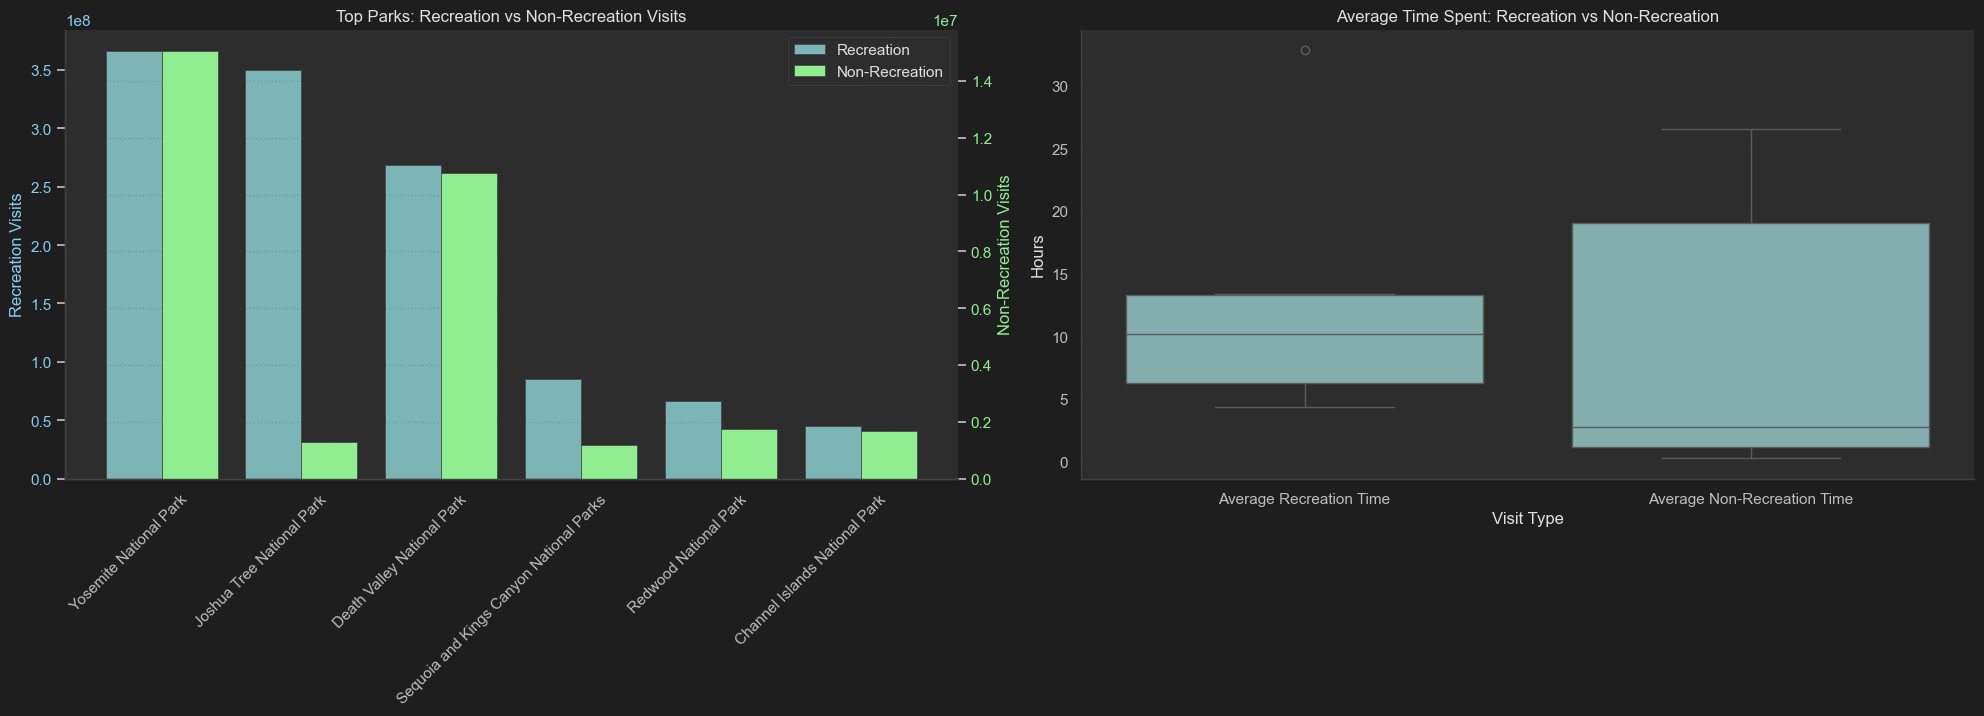


Visit Statistics:
--------------------------------------------------

Top 5 Parks by Recreation Visits:
                                 Park Name  Recreation Visits
5                   Yosemite National Park          366324580
2                Joshua Tree National Park          349933228
1               Death Valley National Park          268310208
4  Sequoia and Kings Canyon National Parks           85309329
3                    Redwood National Park           66275010

Top 5 Parks by Non-Recreation Visits:
                       Park Name  Non-Recreation Visits
5         Yosemite National Park               15055698
1     Death Valley National Park               10774552
3          Redwood National Park                1753488
0  Channel Islands National Park                1683186
2      Joshua Tree National Park                1302297

Average Time Spent (Hours):
Recreation: 12.80
Non-Recreation: 9.54
Non-recreational visits are generally less frequent than recreational visits, ev

In [7]:
def analyze_visit_patterns(df):
    """
    Analyze patterns in recreational vs non-recreational visits and camping preferences.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing park visit information
    """
    # Set style
    ParksTheme.set_theme('dark')

    # Convert relevant columns to numeric
    visit_columns = ['Recreation Visits', 'Non-Recreation Visits',
                     'Recreation Hours', 'Non-Recreation Hours',
                     'Tent Campers', 'RV Campers', 'Backcountry Campers']

    for col in visit_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate average time spent
    df['Average Recreation Time'] = df['Recreation Hours'] / df['Recreation Visits']
    df['Average Non-Recreation Time'] = df['Non-Recreation Hours'] / df['Non-Recreation Visits']

    # Aggregate by park
    park_metrics = df.groupby('Park Name').agg({
        'Recreation Visits': 'sum',
        'Non-Recreation Visits': 'sum',
        'Average Recreation Time': 'mean',
        'Average Non-Recreation Time': 'mean',
        'Tent Campers': 'sum',
        'RV Campers': 'sum',
        'Backcountry Campers': 'sum',
        'Latitude': 'first',
        'Longitude': 'first'
    }).reset_index()

    # Create visualizations
    fig = plt.figure(figsize=(20, 12))

    # 1. Compare Recreation vs Non-Recreation Visits with dual axes
    ax1 = plt.subplot(2, 2, 1)
    ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

    top_parks = park_metrics.nlargest(8, 'Recreation Visits')
    x = range(len(top_parks))

    # Plot Recreation Visits on primary y-axis
    rec_bars = ax1.bar(x, top_parks['Recreation Visits'],
                       width=0.4,
                       #  color='skyblue',
                       label='Recreation')
    ax1.set_ylabel('Recreation Visits', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')

    # Plot Non-Recreation Visits on secondary y-axis
    non_rec_bars = ax2.bar([i + 0.4 for i in x],
                           top_parks['Non-Recreation Visits'],
                           width=0.4,
                           color='lightgreen',
                           label='Non-Recreation')
    ax2.set_ylabel('Non-Recreation Visits', color='lightgreen')
    ax2.tick_params(axis='y', labelcolor='lightgreen')

    # Customize the plot
    ax1.set_title('Top Parks: Recreation vs Non-Recreation Visits')
    ax1.set_xticks([i + 0.4 for i in x])
    ax1.set_xticklabels(top_parks['Park Name'], rotation=45, ha='right')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # 2. Average Time Spent Comparison
    ax3 = plt.subplot(2, 2, 2)
    time_data = pd.melt(park_metrics,
                        id_vars=['Park Name'],
                        value_vars=['Average Recreation Time', 'Average Non-Recreation Time'],
                        var_name='Visit Type',
                        value_name='Hours')

    sns.boxplot(data=time_data, x='Visit Type', y='Hours', ax=ax3)
    ax3.set_title('Average Time Spent: Recreation vs Non-Recreation')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\nVisit Statistics:")
    print("-" * 50)
    print("\nTop 5 Parks by Recreation Visits:")
    print(top_parks[['Park Name', 'Recreation Visits']].head())

    print("\nTop 5 Parks by Non-Recreation Visits:")
    print(park_metrics.nlargest(5, 'Non-Recreation Visits')[['Park Name', 'Non-Recreation Visits']])

    print("\nAverage Time Spent (Hours):")
    print(f"Recreation: {park_metrics['Average Recreation Time'].mean():.2f}")
    print(f"Non-Recreation: {park_metrics['Average Non-Recreation Time'].mean():.2f}")

analyze_visit_patterns(data)
print("Non-recreational visits are generally less frequent than recreational visits, even the average time spent is higher for recreational activities.")
print("Still, Non-recreational visits are significant in some parks, and their average time spent varies widely.")

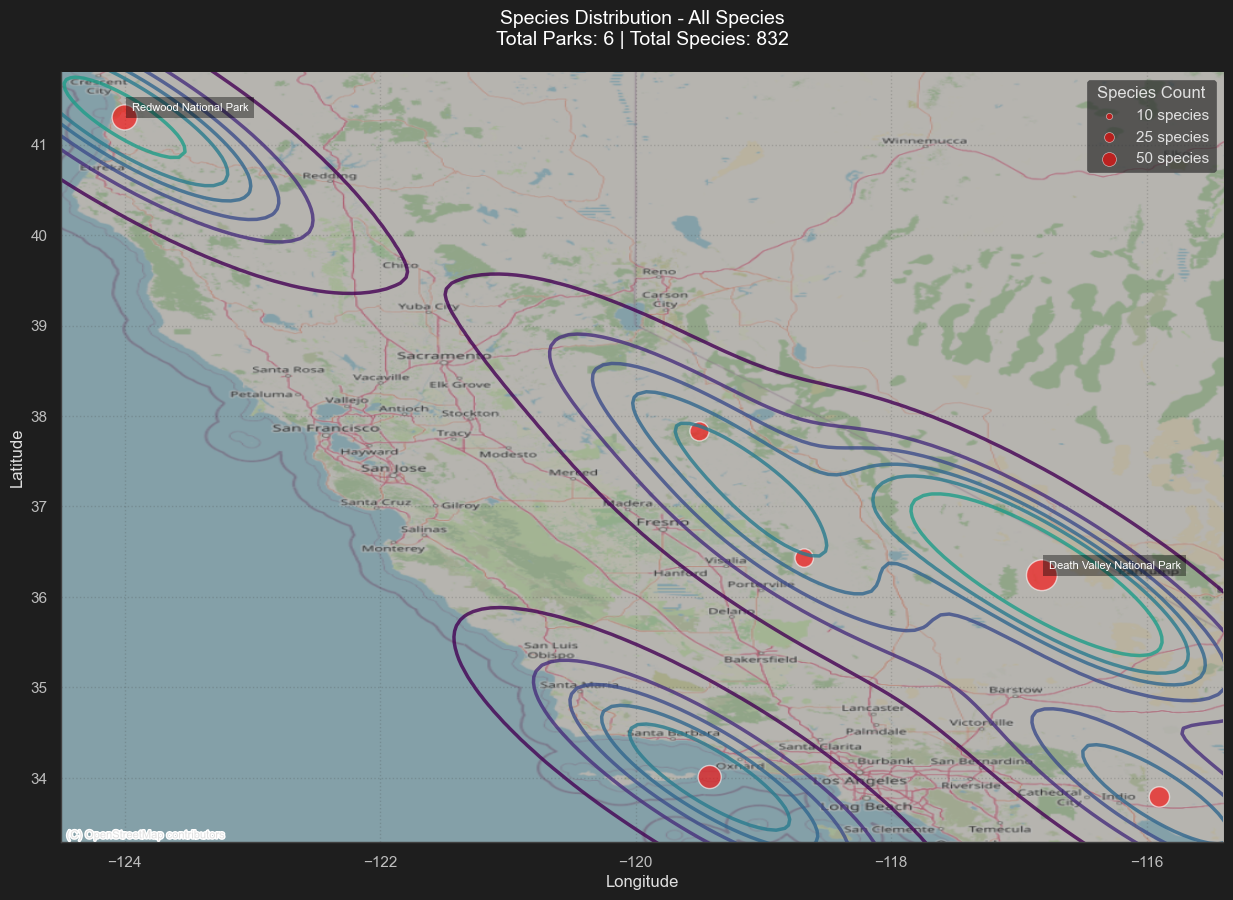

In [9]:
def plot_species_distribution_with_map(data, species_category=None):
    """
    Create an enhanced geographic distribution plot with map background
    """
    # Set style
    ParksTheme.set_theme('dark')

    # Filter data
    plot_data = data.copy()
    if species_category:
        plot_data = plot_data[plot_data['Category'] == species_category]

    # Create figure with specific size ratio
    f, ax = plt.subplots(figsize=(15, 10))

    # Set map bounds with some padding
    padding = 0.5
    ax.set_xlim(plot_data['Longitude'].min() - padding, plot_data['Longitude'].max() + padding)
    ax.set_ylim(plot_data['Latitude'].min() - padding, plot_data['Latitude'].max() + padding)

    # Add basemap with custom opacity
    ctx.add_basemap(ax, crs='EPSG:4326',
                    source=ctx.providers.OpenStreetMap.Mapnik,
                    alpha=0.7)

    # Add KDE contours with gradient color
    sns.kdeplot(data=plot_data,
                x='Longitude',
                y='Latitude',
                levels=7,  # More contour levels
                linewidths=2.5,
                alpha=0.8,
                cmap='viridis',  # Using a colorful gradient
                ax=ax)

    # Add points with size based on species count
    park_counts = plot_data.groupby(['Park Name', 'Latitude', 'Longitude']).size().reset_index(name='count')

    # Scatter plot with sized points
    scatter = ax.scatter(park_counts['Longitude'],
                         park_counts['Latitude'],
                         s=park_counts['count'] * 2,  # Size based on count
                         c='red',  # Bright color for visibility
                         alpha=0.6,
                         edgecolor='white',
                         linewidth=1)

    # Add park labels for points with significant counts
    for idx, row in park_counts.iterrows():
        if row['count'] > park_counts['count'].mean():
            ax.annotate(row['Park Name'],
                        (row['Longitude'], row['Latitude']),
                        xytext=(5, 5),
                        textcoords='offset points',
                        fontsize=8,
                        color='white',
                        bbox=dict(facecolor='black', alpha=0.4, edgecolor='none'))

    # Customize title and styling
    title = f"Species Distribution - {species_category if species_category else 'All Species'}"
    subtitle = f"Total Parks: {len(park_counts)} | Total Species: {len(plot_data)}"

    ax.set_title(title + '\n' + subtitle,
                 pad=20,
                 fontsize=14,
                 color='white')

    # Add legend for point sizes
    legend_elements = [plt.scatter([], [], s=s,
                                   c='red',
                                   alpha=0.6,
                                   edgecolor='white',
                                   label=f'{int(s/2)} species')
                       for s in [20, 50, 100]]
    ax.legend(handles=legend_elements,
              title='Species Count',
              loc='upper right',
              framealpha=0.7)

    return f

fig = plot_species_distribution_with_map(data)
plt.show()

/var/folders/4g/zdc8n6kn3hzgvqwnynl5sslh0000gn/T/ipykernel_17265/1898724733.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/4g/zdc8n6kn3hzgvqwnynl5sslh0000gn/T/ipykernel_17265/1898724733.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


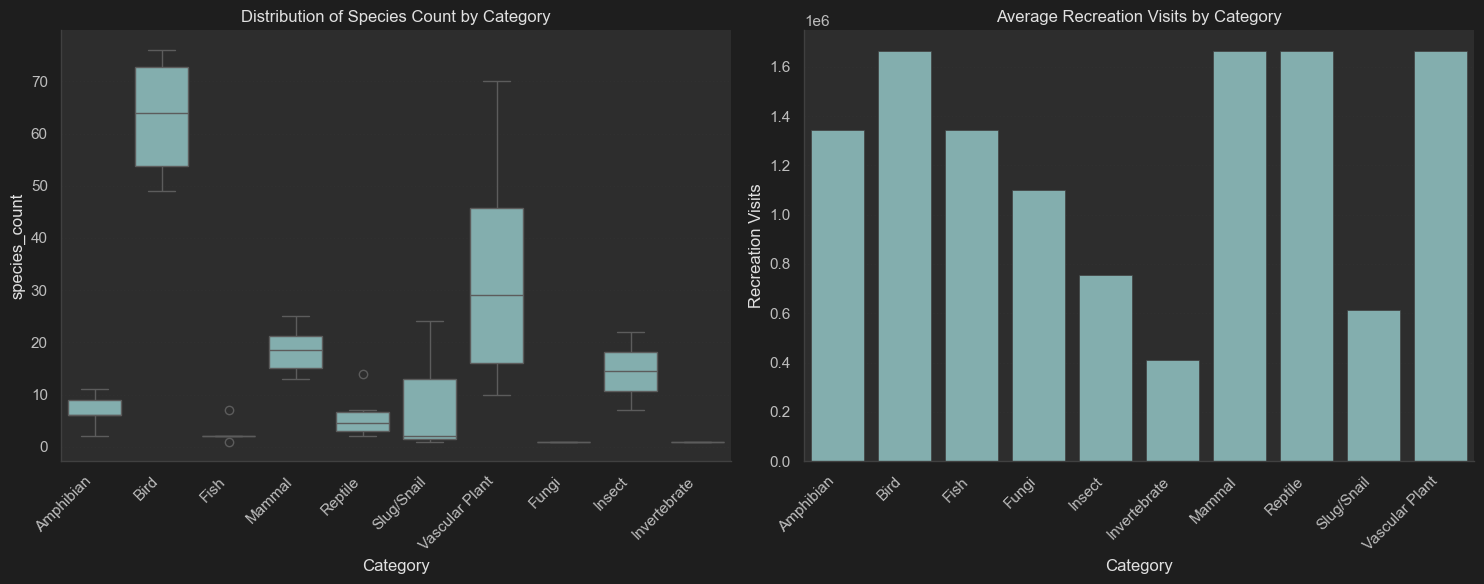


Summary Statistics for Category:

Species Count and Visit Statistics by Category:
               species_count                   Recreation Visits           
                        mean median count  sum              mean     median
Category                                                                   
Amphibian               6.80    6.0     5   34        1343024.00   980567.0
Bird                   63.17   64.0     6  379        1664254.00  1040099.5
Fish                    2.80    2.0     5   14        1343024.00   980567.0
Fungi                   1.00    1.0     1    1        1099632.00  1099632.0
Insect                 14.50   14.5     2   29         754368.50   754368.5
Invertebrate            1.00    1.0     1    1         409105.00   409105.0
Mammal                 18.50   18.5     6  111        1664254.00  1040099.5
Reptile                 5.83    4.5     6   35        1664254.00  1040099.5
Slug/Snail              9.00    2.0     3   27         612494.33   409105.0
Vascu

In [10]:
def analyze_species_impact(df, category_column, visit_type='Recreation Visits'):
    """
    Analyze how different species categories affect park visits.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset containing park and species information
    category_column : str
        The column to analyze (e.g., 'Order', 'Family', 'Category')
    visit_type : str, optional
        Type of visits to analyze (default: 'Recreation Visits')
    """
    ParksTheme.set_theme('dark')
    # Convert visits to numeric, handling any non-numeric values
    df[visit_type] = pd.to_numeric(df[visit_type], errors='coerce')

    # Group by park and category
    species_by_park = df.groupby(['Park Name', category_column]).size().reset_index(name='species_count')
    visits_by_park = df.groupby('Park Name')[visit_type].mean().reset_index()

    count_column = 'species_count'
    count_label = 'Species Count'

    # Merge species counts with visit data
    analysis_df = species_by_park.merge(visits_by_park, on='Park Name')

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: Distribution of species counts by category
    sns.boxplot(data=species_by_park, x=category_column, y=count_column, ax=ax1)
    ax1.set_title(f'Distribution of {count_label} by {category_column}')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # Plot 2: Average visits by category
    avg_visits = analysis_df.groupby(category_column)[visit_type].mean().reset_index()
    sns.barplot(data=avg_visits, x=category_column, y=visit_type, ax=ax2)
    ax2.set_title(f'Average {visit_type} by {category_column}')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\nSummary Statistics for {category_column}:")


    summary_stats = analysis_df.groupby(category_column).agg({
        count_column: ['mean', 'median', 'count', 'sum'],
        visit_type: ['mean', 'median']
    }).round(2)
    print("\nSpecies Count and Visit Statistics by Category:")
    print(summary_stats)

    # Top parks for each category
    print(f"\nTop 3 Parks with Most Species for each {category_column}:")
    for category in species_by_park[category_column].unique():
        print(f"\n{category}:")
        category_parks = species_by_park[species_by_park[category_column] == category].nlargest(3, count_column)
        for _, row in category_parks.iterrows():
            value = row[count_column]
            print(f"- {row['Park Name']}: {value} species")

analyze_species_impact(data, 'Category')


Absolute counts by seasonality:
Seasonality
Breeder              529
Breeder, Resident      1
Migratory            124
Resident              87
Summer                 1
Vagrant               90
dtype: int64

Detailed status breakdown:
Federal Conservation Status  0.0  1.0  2.0  3.0
Seasonality                                    
Breeder                       33  401   32   63
Breeder, Resident              0    0    0    1
Migratory                      1  108    2   13
Resident                       8   72    4    3
Summer                         0    1    0    0
Vagrant                        4   78    5    3


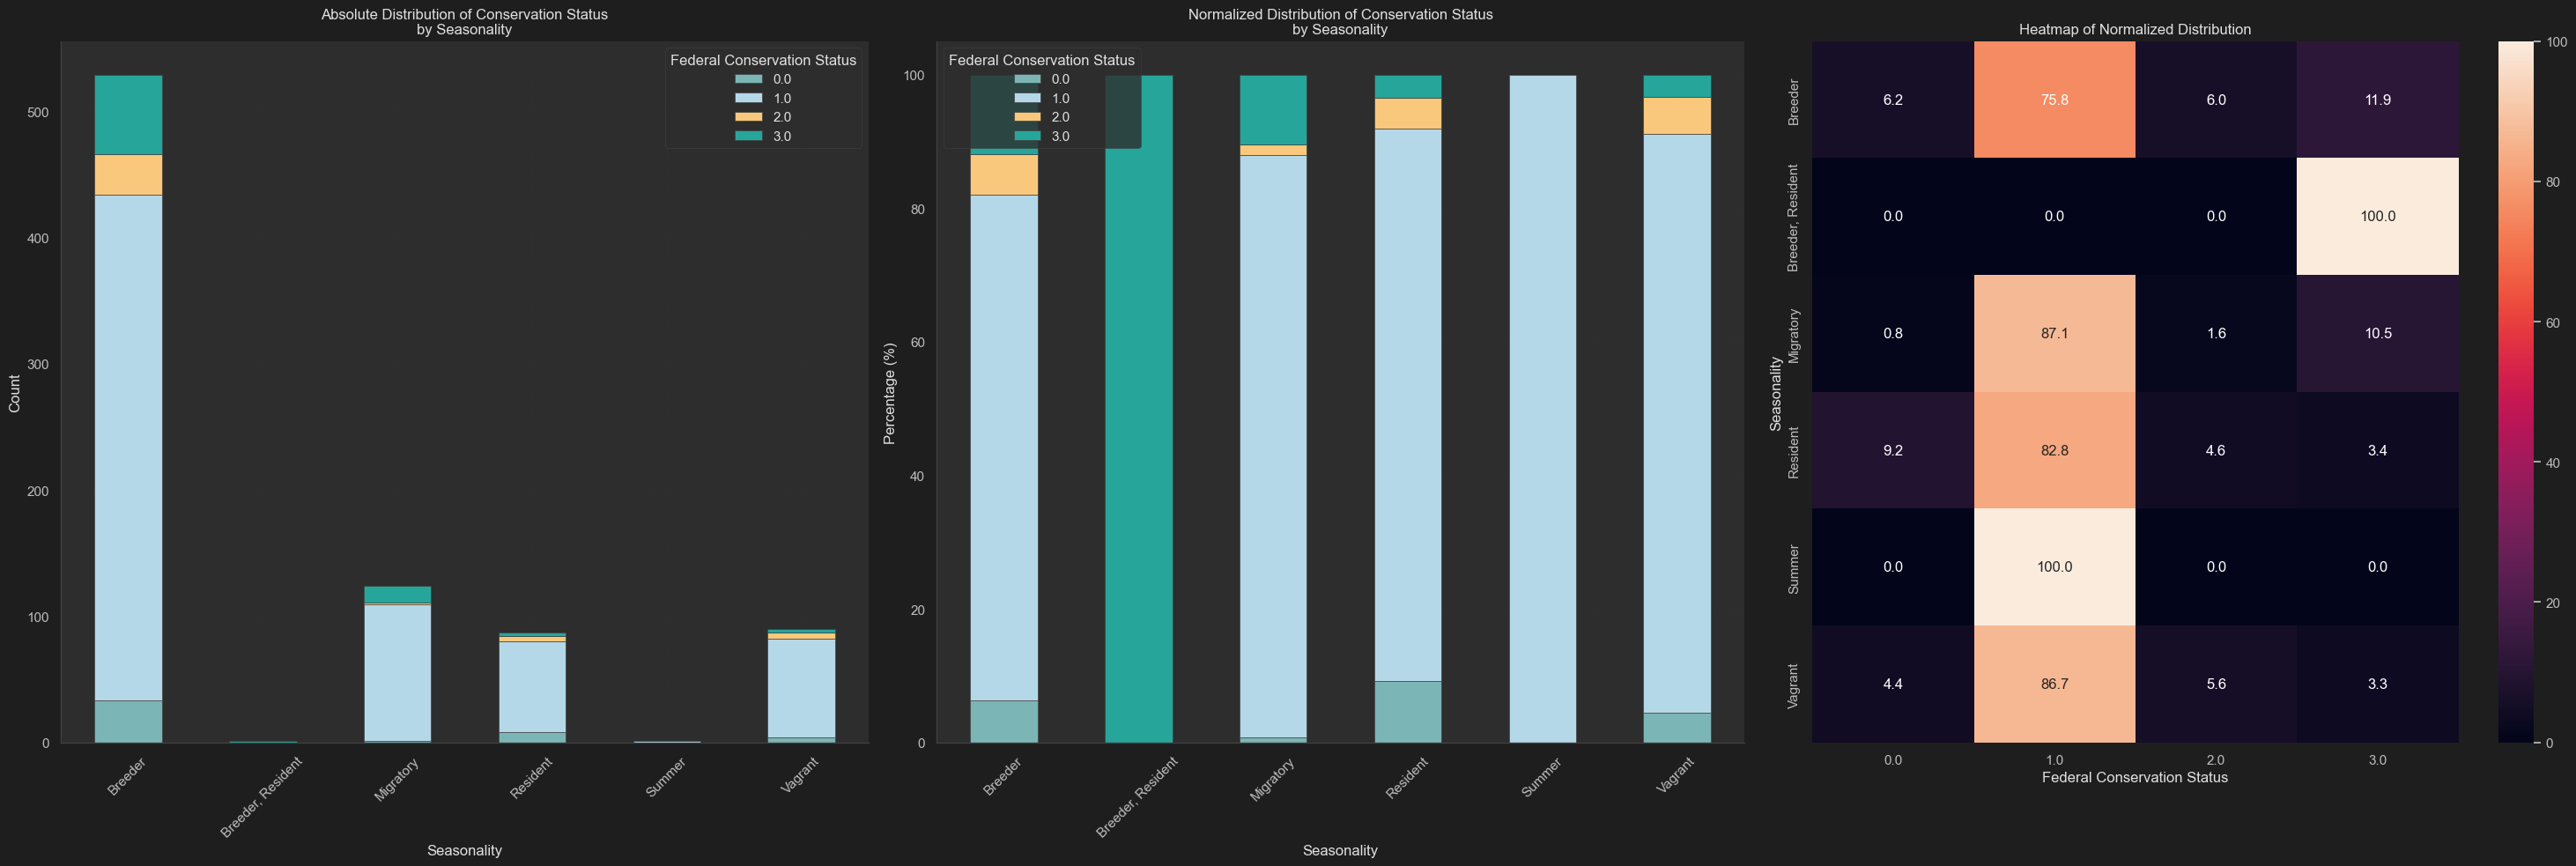

In [11]:
def distribution_analysis(data, category_col, status_col):
    ParksTheme.set_theme('dark')
    # Create a figure with three subplots
    fig = plt.figure(figsize=(30, 10))

    # Define grid for subplots (1 row, 3 columns)
    gs = fig.add_gridspec(1, 3)

    # Calculate both absolute and normalized counts
    absolute_counts = pd.crosstab(data[category_col], data[status_col])
    proportions = pd.crosstab(data[category_col], data[status_col], normalize='index') * 100

    # Plot 1: Absolute counts stacked bar
    ax1 = fig.add_subplot(gs[0, 0])
    absolute_counts.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title('Absolute Distribution of Conservation Status\nby Seasonality')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)

    # Plot 2: Normalized stacked bar
    ax2 = fig.add_subplot(gs[0, 1])
    proportions.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Normalized Distribution of Conservation Status\nby Seasonality')
    ax2.set_ylabel('Percentage (%)')
    ax2.tick_params(axis='x', rotation=45)

    # Plot 3: Heatmap of the normalized data
    ax3 = fig.add_subplot(gs[0, 2])
    sns.heatmap(proportions, annot=True, fmt='.1f', ax=ax3)
    ax3.set_title('Heatmap of Normalized Distribution')

    plt.tight_layout()

    # Print summary statistics
    print("\nAbsolute counts by seasonality:")
    print(absolute_counts.sum(axis=1))
    print("\nDetailed status breakdown:")
    print(absolute_counts)

# Usage:
fig = distribution_analysis(data, 'Seasonality', 'Federal Conservation Status')
plt.show()